# Projet Machine Learning - Cdiscount et ordinateur portable
Desroches Blandine ~ M2 Mécen

# Scraping des données

- Les deux cellules de code pour le scraping sont en raw pour pouvoir run le notebook sans lancer automatiquement le scraping

# Transformation du dataframe

In [1]:
import numpy as np
import regex as re
import json
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline

In [2]:
import nettoyage_projet as ntp

In [3]:
brute = [json.loads(line) for line in open('brute1.json', 'r')]
df1 = pd.DataFrame(brute)
df1.to_csv(r'brute.csv')
df = pd.read_csv("brute.csv", sep=",")
pd.options.mode.chained_assignment = None  # default='warn'

- Base de données brute récupérée par le scraping.

In [4]:
df.head()

,Unnamed: 0,prix,lien,nom,desc
0,0,625€00,https://www.cdiscount.com/informatique/ordinat...,"Apple MacBook Pro A1278 MD101 13.3"" Intel Core...","Apple MacBook Pro A1278 MD101 13.3"" Intel Core..."
1,1,1101€99,https://www.cdiscount.com/informatique/ordinat...,"ACER PC Portable Gamer Predator - 15,6"" FHD 14...","Processeur : Intel Core i5-9300H, Fréquence 2,..."
2,2,1039€99,https://www.cdiscount.com/informatique/ordinat...,MSI PC Portable - PRESTIGE 14 A10RB-018FR - 14...,Processeur : Intel Core i7 (10ème génération) ...
3,3,1459€99,https://www.cdiscount.com/informatique/ordinat...,"Apple - 13,3"" MacBook Pro Touch Bar (2020) - I...",Usage : Ultraportable & Performant\nProcesseur...
4,4,820€69,https://www.cdiscount.com/informatique/ordinat...,LENOVO ThinkBook 15-IIL - Core i5-1035G1 - 8 G...,Usage : Ultraportable & Performant\nProcesseur...


In [5]:
df = (df.pipe(ntp.encodage_prix)
      .pipe(ntp.supression_caractere_spe_colonnes))

In [6]:
df.head()

,Unnamed: 0,prix,lien,nom,desc
0,0,625,https://www.cdiscount.com/informatique/ordinat...,applemacbookproa1278md101133intelcorei525ghz16...,applemacbookproa1278md101133intelcorei525ghzma...
1,1,1101,https://www.cdiscount.com/informatique/ordinat...,acerpcportablegamerpredator156fhd144hzcorei593...,processeurintelcorei59300hfrquence24ghzturbo41...
2,2,1039,https://www.cdiscount.com/informatique/ordinat...,msipcportableprestige14a10rb018fr14fhdcorei710...,processeurintelcorei710megnration10510uram16go...
3,3,1459,https://www.cdiscount.com/informatique/ordinat...,apple133macbookprotouchbar2020intelcorei5ram8g...,usageultraportableperformantprocesseurintelcor...
4,4,820,https://www.cdiscount.com/informatique/ordinat...,lenovothinkbook15iilcorei51035g18goram256gossd...,usageultraportableperformantprocesseurintelcor...


### Gestion colonne processeur
- Création nouvelle colonne proc


- Valeur possible : 0 = i5 ; 1 = i7 ; 2 = i3 ; 3 = AMD Ryzen 7; 4 = AMD Ryzen 5 ;


In [7]:
df = (df.pipe(ntp.encodage_processeur))
df.head()

,Unnamed: 0,prix,lien,nom,desc,proc
0,0,625,https://www.cdiscount.com/informatique/ordinat...,applemacbookproa1278md101133intelcorei525ghz16...,applemacbookproa1278md101133intelcorei525ghzma...,0
1,1,1101,https://www.cdiscount.com/informatique/ordinat...,acerpcportablegamerpredator156fhd144hzcorei593...,processeurintelcorei59300hfrquence24ghzturbo41...,0
2,2,1039,https://www.cdiscount.com/informatique/ordinat...,msipcportableprestige14a10rb018fr14fhdcorei710...,processeurintelcorei710megnration10510uram16go...,1
3,3,1459,https://www.cdiscount.com/informatique/ordinat...,apple133macbookprotouchbar2020intelcorei5ram8g...,usageultraportableperformantprocesseurintelcor...,0
4,4,820,https://www.cdiscount.com/informatique/ordinat...,lenovothinkbook15iilcorei51035g18goram256gossd...,usageultraportableperformantprocesseurintelcor...,0


### Gestion colonne RAM
- Création nouvelle colonne ram ;
- Valeur possible : 0 = 2Go ; 1 = 4Go ; 2 = 8Go ; 3 = 16Go ; 4 = 32Go

In [8]:
df = (df.pipe(ntp.encodage_ram))
df.head()

,Unnamed: 0,prix,lien,nom,desc,proc,ram
0,0,625,https://www.cdiscount.com/informatique/ordinat...,applemacbookproa1278md101133intelcorei525ghz16...,applemacbookproa1278md101133intelcorei525ghzma...,0,3
1,1,1101,https://www.cdiscount.com/informatique/ordinat...,acerpcportablegamerpredator156fhd144hzcorei593...,processeurintelcorei59300hfrquence24ghzturbo41...,0,2
2,2,1039,https://www.cdiscount.com/informatique/ordinat...,msipcportableprestige14a10rb018fr14fhdcorei710...,processeurintelcorei710megnration10510uram16go...,1,3
3,3,1459,https://www.cdiscount.com/informatique/ordinat...,apple133macbookprotouchbar2020intelcorei5ram8g...,usageultraportableperformantprocesseurintelcor...,0,2
4,4,820,https://www.cdiscount.com/informatique/ordinat...,lenovothinkbook15iilcorei51035g18goram256gossd...,usageultraportableperformantprocesseurintelcor...,0,2


### Colonne marque
- Création nouvelle colonne marq ;
- Valeur possible : 0 = Asus ; 1 = Apple ; 2 = Lenovo ; 3 = Acer ; 4 = Hp ; 5 = Huawei ; 6 = MSI ; 7 = Dell

In [9]:
df = (df.pipe(ntp.encodage_marque))

In [10]:
df = (df.pipe(ntp.suppression_colonnes_inutiles))
df.head()

,prix,proc,ram,marq
0,625,0,3,1
1,1101,0,2,3
2,1039,1,3,6
3,1459,0,2,1
4,820,0,2,2


In [11]:
ntp.verification_valeur_manquante(df)

prix    False
proc    False
ram     False
marq    False
dtype: bool


Pas de données manquantes

In [12]:
df.to_csv(r'propre.csv')
propre = pd.read_csv("propre.csv", sep=",")

In [13]:
df = (
    propre
    .pipe(ntp.conversion_types)  
    .pipe(ntp.numerise_les_colonnes)
    .pipe(ntp.suppression_colonne)   
)

In [14]:
df.dtypes

prix    Int64
proc    Int64
ram     int64
marq    Int64
dtype: object

# Analyse statistiques de la base données

In [15]:
df.describe()

,prix,proc,ram,marq
count,1137.000000,1137.000000,1137.000000,1137.000000
mean,843.651715,0.493404,2.811785,2.856640
std,547.966744,0.838237,1.119498,2.106252
min,106.000000,0.000000,1.000000,0.000000
25%,468.000000,0.000000,2.000000,1.000000
50%,645.000000,0.000000,3.000000,2.000000
75%,1099.000000,1.000000,4.000000,4.000000
max,4924.000000,4.000000,4.000000,7.000000


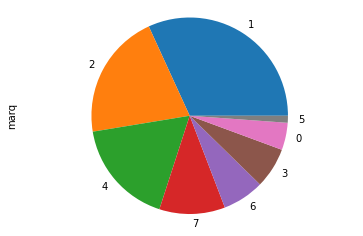

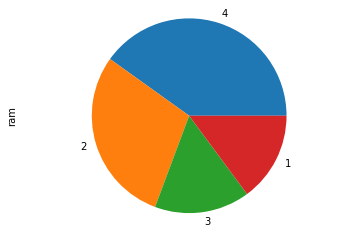

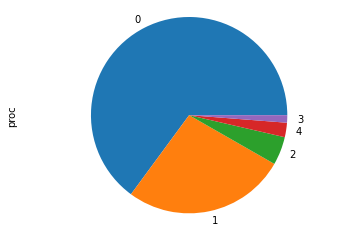

In [16]:
ntp.pie_chart(df)

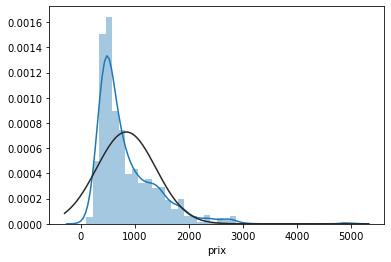

In [17]:
ntp.densité_prix(df)

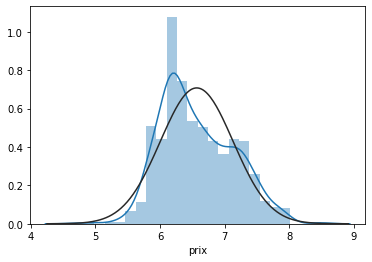

In [18]:
ntp.densité_log_prix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002565DFFC400>,
      dtype=object)

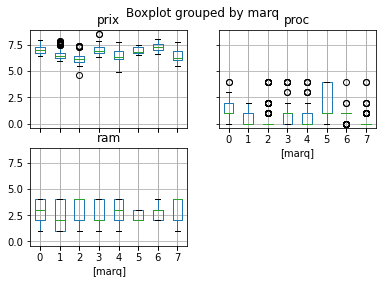

In [19]:
df.boxplot(by='marq')

In [20]:
ntp.moyenne_par_groupe(df)

          prix      proc       ram
marq                              
0     7.048780  1.274510  2.882353
1     6.574745  0.265193  2.511050
2     6.198069  0.368644  3.148305
3     7.026963  1.105263  2.684211
4     6.476530  0.494949  2.767677
5     6.985546  2.000000  2.461538
6     7.317503  0.871795  2.820513
7     6.411961  0.300813  3.203252
          prix       ram      marq
proc                              
0     6.369916  2.792683  2.743902
1     7.059432  2.908197  3.104918
2     6.356406  2.509434  2.905660
3     6.888791  3.142857  2.285714
4     6.721588  2.666667  3.333333
         prix      proc      marq
ram                              
1    6.285821  0.378698  2.082840
2    6.707963  0.509036  2.825301
3    7.222511  0.783333  3.461111
4    6.314783  0.410088  2.927632


In [21]:
df = (df.pipe(ntp.onehot_colonne_proc)
      .pipe(ntp.onehot_colonne_ram)
      .pipe(ntp.onehot_colonne_marq)
      .pipe(ntp.suppression_colonnes_inutiles_2))

In [22]:
df.head()

,prix,Intel Core i5,Intel Core i7,Intel Core i3,AMD Ryzen 7,AMD Ryzen 5,4 Go RAM,8 Go RAM,16 Go RAM,X Go RAM,Asus,Apple,Lenovo,Acer,Hp,Huawei,MSI,Dell
0,6.437752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.003974,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.946014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7.285507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.709304,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Phase exploratoire et modélisation

## Exploration et prédiction du modèle choisi

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [24]:
X = df.drop(['prix', 'Asus','Intel Core i3','X Go RAM'], axis=1).values
print("X shape:",X.shape)
y = df.prix.values
print("y shape:",y.shape)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

X shape: (1137, 14)
y shape: (1137,)


In [25]:
ntp.cherche_le_meilleur_modele(X_tr, y_tr)
df_result = pd.read_csv("df_result.csv", sep="\t")
df_result = df_result.drop(['Unnamed: 0'], axis=1)
df_result.head()

,Modele,Moyenne,Ecart Type
0,"RandomForestRegressor(max_depth=100, n_estimat...",0.602786,0.024939
1,"RandomForestRegressor(max_depth=90, n_estimato...",0.597723,0.014380
2,"RandomForestRegressor(max_depth=80, n_estimato...",0.597378,0.013981
3,"RandomForestRegressor(max_depth=80, n_estimato...",0.596276,0.012988
4,"RandomForestRegressor(max_depth=90, n_estimato...",0.596179,0.012427


In [ ]:
ntp.Trouver_meilleur_Random_Forest(X_tr, y_tr)

## Evaluation complète du modèle

In [41]:
best_model = RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=50)

Model score 0.6053491488064486
Mean Absolute Error (MAE): 0.27758577393180883
Mean Squared Error (MSE): 0.12975413168564276
Root Mean Squared Error (RMSE): 0.3602140081751996
Mean Absolute Percentage Error (MAPE): 4.28
Accuracy: 95.72


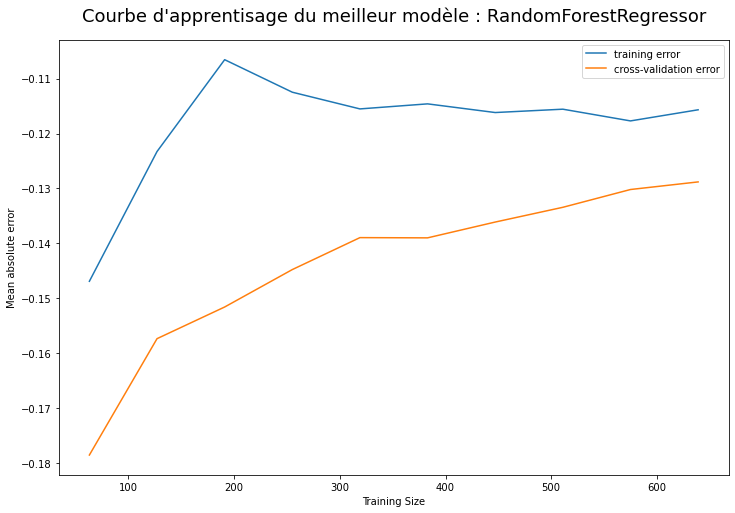

In [42]:
ntp.evaluation(best_model,X, y, X_tr, y_tr, X_te, y_te)